## Practice final exam

#### Instructions:
- Complete the tasks listed in this notebook by answering questions and writing the code in the cell provided
- Each task has a number of points associated with it, the complete exam assignment has 100 points
- The grade is the total number of points earned
- Started but not completed tasks, as well as task completed with errors earn partial points
- You will have 120 minutes to compete the exam, this practice exam is calibrated for 30 minutes

### question 1 (2 points)
What are the necessary components of a class code in Python?

Answer:1. write a Class 2.  __init__:the initialisation method of an object, which is called when the object is created.
3. __repr__: to print something  4. self parameter 

### question 2 (2 points)
Name 10 different optimization methods available in Python, and give a typical use case for each.

Answer:1. Zero finding: Newton's method: optimize.newton:require analytical gradient.
2.optimize.minimize(method='Nelder-Mead'):Minimization of scalar function of one or more variables using the Nelder-Mead algorithm.
3.optimize.minimize(method='Newton-CG'): require analytical gradient.
4.optimize.brentq: Required knowledge of an interval  [a,b][a,b]  where  f(a)f(a)  and  f(b)f(b)  have different signs.
5.

### question 3 (2 points)
Compute the stationary distribution of a Markov chain given by the following transition probability

$$
p=
\begin{pmatrix} 
0.1 & 0.1 & 0 & 0.8 \\
0 & 0.4 & 0.4 & 0.2 \\
0.9 & 0.1 & 0 & 0 \\
0.3 & 0.2 & 0.3 & 0.2 \\
\end{pmatrix}
$$


In [49]:
# write your code here
import quantecon as qe
P = [[0.1, 0.1,0,0.8], [0, 0.4,0.4,0.4],[0.9,0.1,0,0],[0.3,0.2,0.3,0.2]]
mc = qe.MarkovChain(P)
mc.stationary_distributions  # Show all stationary distributions

### question 4 (2 points)
What is the best approximation scheme on $[0,1]$ for the function shown below. Why?

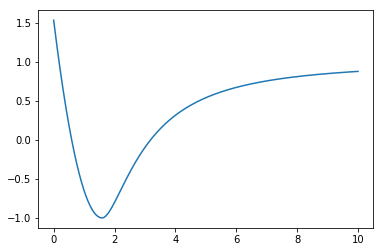

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    res=(x-5/np.pi)**2-1
    m=x>5/np.pi
    res[m]=np.cos(5/x[m])
    return res

plt.plot(np.linspace(0,10,1000),f(np.linspace(0,10,1000)))

Answer:

### question 5 (2 points)
The code below is intended for repeated generation of the same sequence of random numbers, but does not work. Fix the bug.

In [70]:
import numpy as np
import random

In [88]:
import numpy as np
import random
random.seed(1)
def samenumber():
    for i in range(10):
        # generate sequence of five numbers
        r = np.random.uniform(1,10,5)
        print(r)
random.seed(1)

samenumber()

[ 2.24066793  7.54420472  6.32210096  3.87793745  5.31908488]
[ 6.01855894  1.36413862  3.91217886  5.91696168  7.55742633]
[ 6.8538599   1.7511659   3.74298348  4.38695863  5.35110457]
[ 8.8006562   2.17838339  2.08978428  3.57363277  6.98497186]
[ 1.2374435   3.45279636  7.44034724  1.30192799  2.21245858]
[ 8.13886946  8.26893129  5.29489912  6.34250583  5.21468839]
[ 5.17385742  7.3976408   3.41205808  7.39825322  4.50238999]
[ 6.65596212  5.31653958  9.95921658  5.62904446  8.29270371]
[ 2.77475852  8.75093631  1.79625301  5.25179253  8.9394888 ]
[ 3.05424199  3.16936957  7.60216724  2.70950818  9.03036799]


### question 6 (5 points)

Write a short code to output 10 smallest and 10 largest representable float64 numbers as a NumPy array.

In [99]:
# write your code here
x = np.float64(1.0)
a = np.array([ 1.,  2.,  3.], dtype=np.float64)
import numpy as np
x = np.array([ 1.,  2.,  3.,5.,7.,13.,34.,56.,78.,23.,45.,67.,23.,12.,34.,56.,1.], dtype=np.float64)
print("Original array:")
print(x)
np.random.shuffle(x)
n = 10
print (x[np.argsort(x)[:n]])

Original array:
[  1.   2.   3.   5.   7.  13.  34.  56.  78.  23.  45.  67.  23.  12.  34.
  56.   1.]
[  1.   1.   2.   3.   5.   7.  12.  13.  23.  23.]


### question 7 (10 points)

Write a short code to run a Monte Carlo experiment for investigating the variability of linear regression estimates.  Perform the following steps:
1. Simulate 100 $x_i$ values between 0 and 10 using uniform distribution
2. Simulate 100 $\varepsilon_i$ values using normal distribution with zero mean and standard deviation 0.5
3. Compute 100 values $y_i = \alpha + \beta x_i + \varepsilon_i$, where true parameters are $\alpha=-2.5$ and $\beta=1.2$
4. Treat pairs $(x_i,y_i)$ as data and estimate the coefficients of linear regressions using the formula

$$
(\hat{\alpha},\hat{\beta})= \big[ (X'X)^{-1}X'Y \big]',
$$

where $X$ is the matrix composed of a column of ones and a column of stacked $x_i$, and $Y$ is the column vector of stacked $y_i$.
5. Print and save the resulted estimates
6. Repeat the same steps for 25 MC runs

Present the result graphically. One plot should picture a typical estimation result (say, from first run of the steps above): it should show the dots representing 100 data points $x_i,y_i$, and the fitted line 
$y = \hat{\alpha} + \hat{\beta}x$.
The other plot should picture together the 25 lines fitted in the MC exercise.

Afterwards, print the MC average estimates of $\alpha$ and $\beta$ and compare to the true values.


In [207]:
# write your code here
import numpy as np
xi = np.random.uniform(low=0.0, high=10.0, size=100)

bi = np.random.normal(loc=0.0, scale=0.5, size=100)
alpha = -2.5
beta = 1.2
def function(alpha,beta,xi,bi):
    return alpha+beta*xi+bi
y = function(alpha,beta,xi,bi)
y_array = np.array(y)
X = np.array([[1]*100,xi])
X = np.asmatrix(X)
X_transpose = X.transpose()
# X_transpose = X.transpose()
# X_transpose.shape

XtimesX = X_transpose @ X
inverse = np.linalg.inv(XtimesX)
c = inverse @ X_transpose 
c.shape
print(y_array)

# XtimesX = X_transpose @ X
# inverse = np.linalg.inv(XtimesX)
# inverse.shape
# d = inverse @ X_transpose 
# y.shape



# c = np.matrix([[1,2,3],[3,4,5]])
# c.transpose()
# X = np.asmatrix(X)
# X.reshape(100,2)
# X2 = X.reshape(100,2)

# X = X.reshape((100,2))


[-1.30554099  4.76044798  2.55944606  2.30285511  7.67146196  6.20179932
  6.69428632 -1.44566314  0.51854214  1.97266522  4.07609623 -2.09535841
  4.99458824  3.75840359  1.09478992  4.45029269  9.37825166  0.67786351
  4.85113694  8.29791438  7.59523058 -2.12475873 -1.68253721  7.27934033
  3.65889731  4.92389573  8.78897051  0.27035125  7.95334345  8.0465258
 -0.91137506  0.04475434  8.69126896  0.44792715  0.10986628  2.59865684
  7.81351539 -0.80784427  9.58422097  0.39842315  5.67211778  4.00589604
  2.40802398  4.7676886   6.91794304  6.65758943  0.35211889  9.19352879
  3.78646757  1.38781001  0.79403241  7.68545872  4.07095181  6.36344815
  4.3410614   0.80309914 -1.34610174  5.22845392  0.3173267   5.29673708
  6.74883402  0.43588832  2.91293293  6.73800493  4.93135809 -0.45800046
 -2.01672664 -0.48072924 -0.29725561  1.7240234   6.91194991  2.2552479
  4.27321896 -1.58270554  7.19306525  0.48005722  1.59393974  7.1688341
  6.85489317  6.70257099  2.28847254  3.93401258  8.25